Importing Libraries

In [ ]:
print("Name: Harish P")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

Name: Harish P


Loading Datasets

In [ ]:
# Downloading the Datasets.
# Loading the Datasets

dftr=pd.read_csv(r"/content/train.csv")
dftr['area_code'] = dftr['area_code'].str.replace('area_code_', '')
dftr.head()

state  account_length area_code international_plan voice_mail_plan  \
0    OH             107       415                 no             yes   
1    NJ             137       415                 no              no   
2    OH              84       408                yes              no   
3    OK              75       415                yes              no   
4    MA             121       510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [ ]:
dfte=pd.read_csv(r"/content/test.csv")
dfte=dfte.drop(columns =['id'],axis =1)
dfte['area_code'] = dfte['area_code'].str.replace('area_code_', '')
dfte.head()

state  account_length area_code international_plan voice_mail_plan  \
0    KS             128       415                 no             yes   
1    AL             118       510                yes              no   
2    IA              62       415                 no              no   
3    VT              93       510                 no              no   
4    NE             174       415                 no              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             37.98              220.6              101             18.75   
2             20.52              307.2               76             26.11   
3             32.42              218.2              111             18.55   
4             21.13              277.1              112             23.55   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                203.9                118                9.18   
2                203.0                 99                9.14   
3                129.6                121                5.83   
4                250.7                115               11.28   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                 6.3                 6               1.70   
2                13.1                 6               3.54   
3                 8.1                 3               2.19   
4                15.5                 5               4.19   

   number_customer_service_calls  
0                              1  
1                              0  
2                              4  
3                              3  
4                              3

Start of Exploratory Data Analysis

In [ ]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
dfte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          750 non-null    object 
 1   account_length                 750 non-null    int64  
 2   area_code                      750 non-null    object 
 3   international_plan             750 non-null    object 
 4   voice_mail_plan                750 non-null    object 
 5   number_vmail_messages          750 non-null    int64  
 6   total_day_minutes              750 non-null    float64
 7   total_day_calls                750 non-null    int64  
 8   total_day_charge               750 non-null    float64
 9   total_eve_minutes              750 non-null    float64
 10  total_eve_calls                750 non-null    int64  
 11  total_eve_charge               750 non-null    float64
 12  total_night_minutes            750 non-null    flo

In [ ]:
dftr.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

In [ ]:
dfte.describe()

account_length  number_vmail_messages  total_day_minutes  \
count      750.000000             750.000000         750.000000   
mean       100.385333               8.454667         180.454933   
std         39.699029              14.123712          53.258337   
min          1.000000               0.000000          12.500000   
25%         74.000000               0.000000         146.625000   
50%        101.000000               0.000000         178.200000   
75%        126.000000              21.000000         215.975000   
max        238.000000              51.000000         350.800000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count       750.000000        750.000000         750.000000       750.000000   
mean        100.721333         30.677920         203.258267       100.273333   
std          19.718539          9.053756          52.185471        19.367535   
min          39.000000          2.130000          31.200000        37.000000   
25%          88.000000         24.925000         166.800000        87.000000   
50%         101.000000         30.295000         203.350000       101.000000   
75%         114.000000         36.715000         235.975000       113.000000   
max         163.000000         59.640000         363.700000       164.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count        750.000000           750.000000         750.000000   
mean          17.277080           199.619467         100.370667   
std            4.435638            51.531351          19.185238   
min            2.650000            50.900000          12.000000   
25%           14.177500           164.475000          88.000000   
50%           17.285000           199.450000         100.500000   
75%           20.057500           234.800000         113.000000   
max           30.910000           364.300000         168.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count          750.000000          750.000000        750.000000   
mean             8.982827           10.294133          4.485333   
std              2.318920            2.770340          2.421901   
min              2.290000            0.000000          0.000000   
25%              7.402500            8.525000          3.000000   
50%              8.975000           10.300000          4.000000   
75%             10.565000           12.100000          6.000000   
max             16.390000           18.900000         19.000000   

       total_intl_charge  number_customer_service_calls  
count         750.000000                     750.000000  
mean            2.779933                       1.634667  
std             0.747704                       1.276207  
min             0.000000                       0.000000  
25%             2.305000                       1.000000  
50%             2.780000                       1.000000  
75%             3.270000                       2.000000  
max             5.100000                       6.000000

Null Values Identification and Replacement

In [ ]:
dftr.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
dfte.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Univariate Analysis

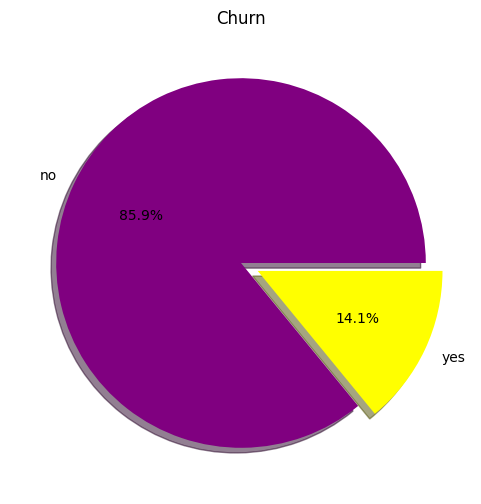

In [ ]:
# 1. Pie Plot
x = dftr.churn.unique().tolist()

fig = plt.figure(figsize=(6, 6))
plt.pie(dftr.churn.value_counts(),[0,0.1],labels = x,autopct ='%1.1f%%',shadow = True,colors = ['purple','yellow',])
plt.title('Churn')
plt.show()

<ipython-input-11-f708b88992d7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dftr['total_intl_charge'])


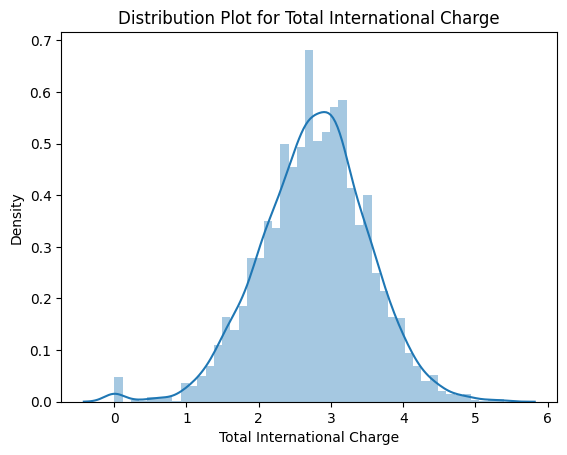

In [ ]:
# 2. Dist Plot

sns.distplot(dftr['total_intl_charge'])
plt.title('Distribution Plot for Total International Charge')
plt.xlabel('Total International Charge')
plt.show()

Bivariate Analysis

In [ ]:
x=dftr['total_day_minutes']
y=dftr['total_eve_minutes']

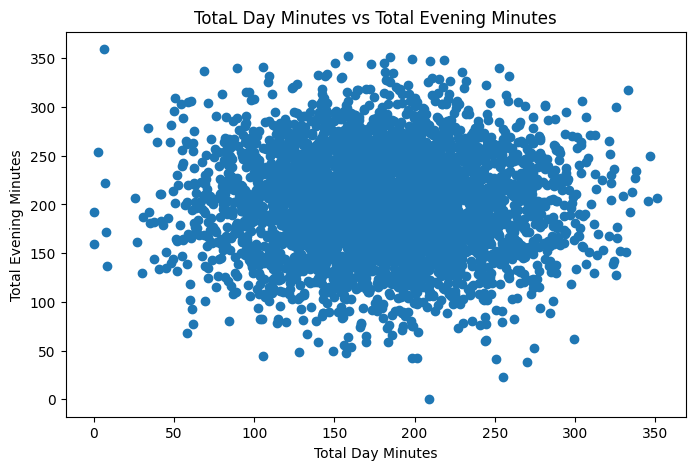

In [ ]:
# 1. Joint Plot

plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.title('TotaL Day Minutes vs Total Evening Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Evening Minutes')
plt.show()

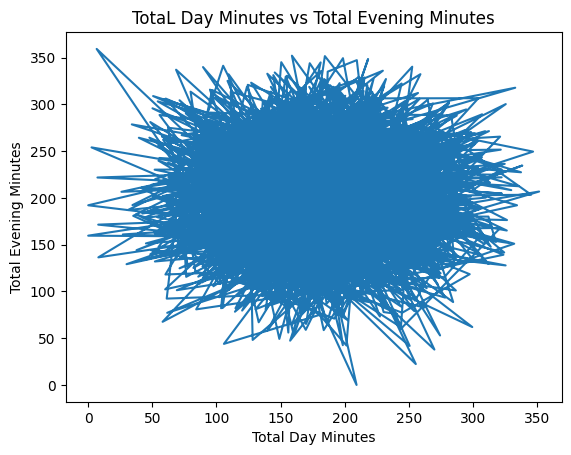

In [ ]:
# 2. Scatter Plot

plt.plot(x,y)
plt.title('TotaL Day Minutes vs Total Evening Minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Evening Minutes')
plt.show()

Multivariate Analysis

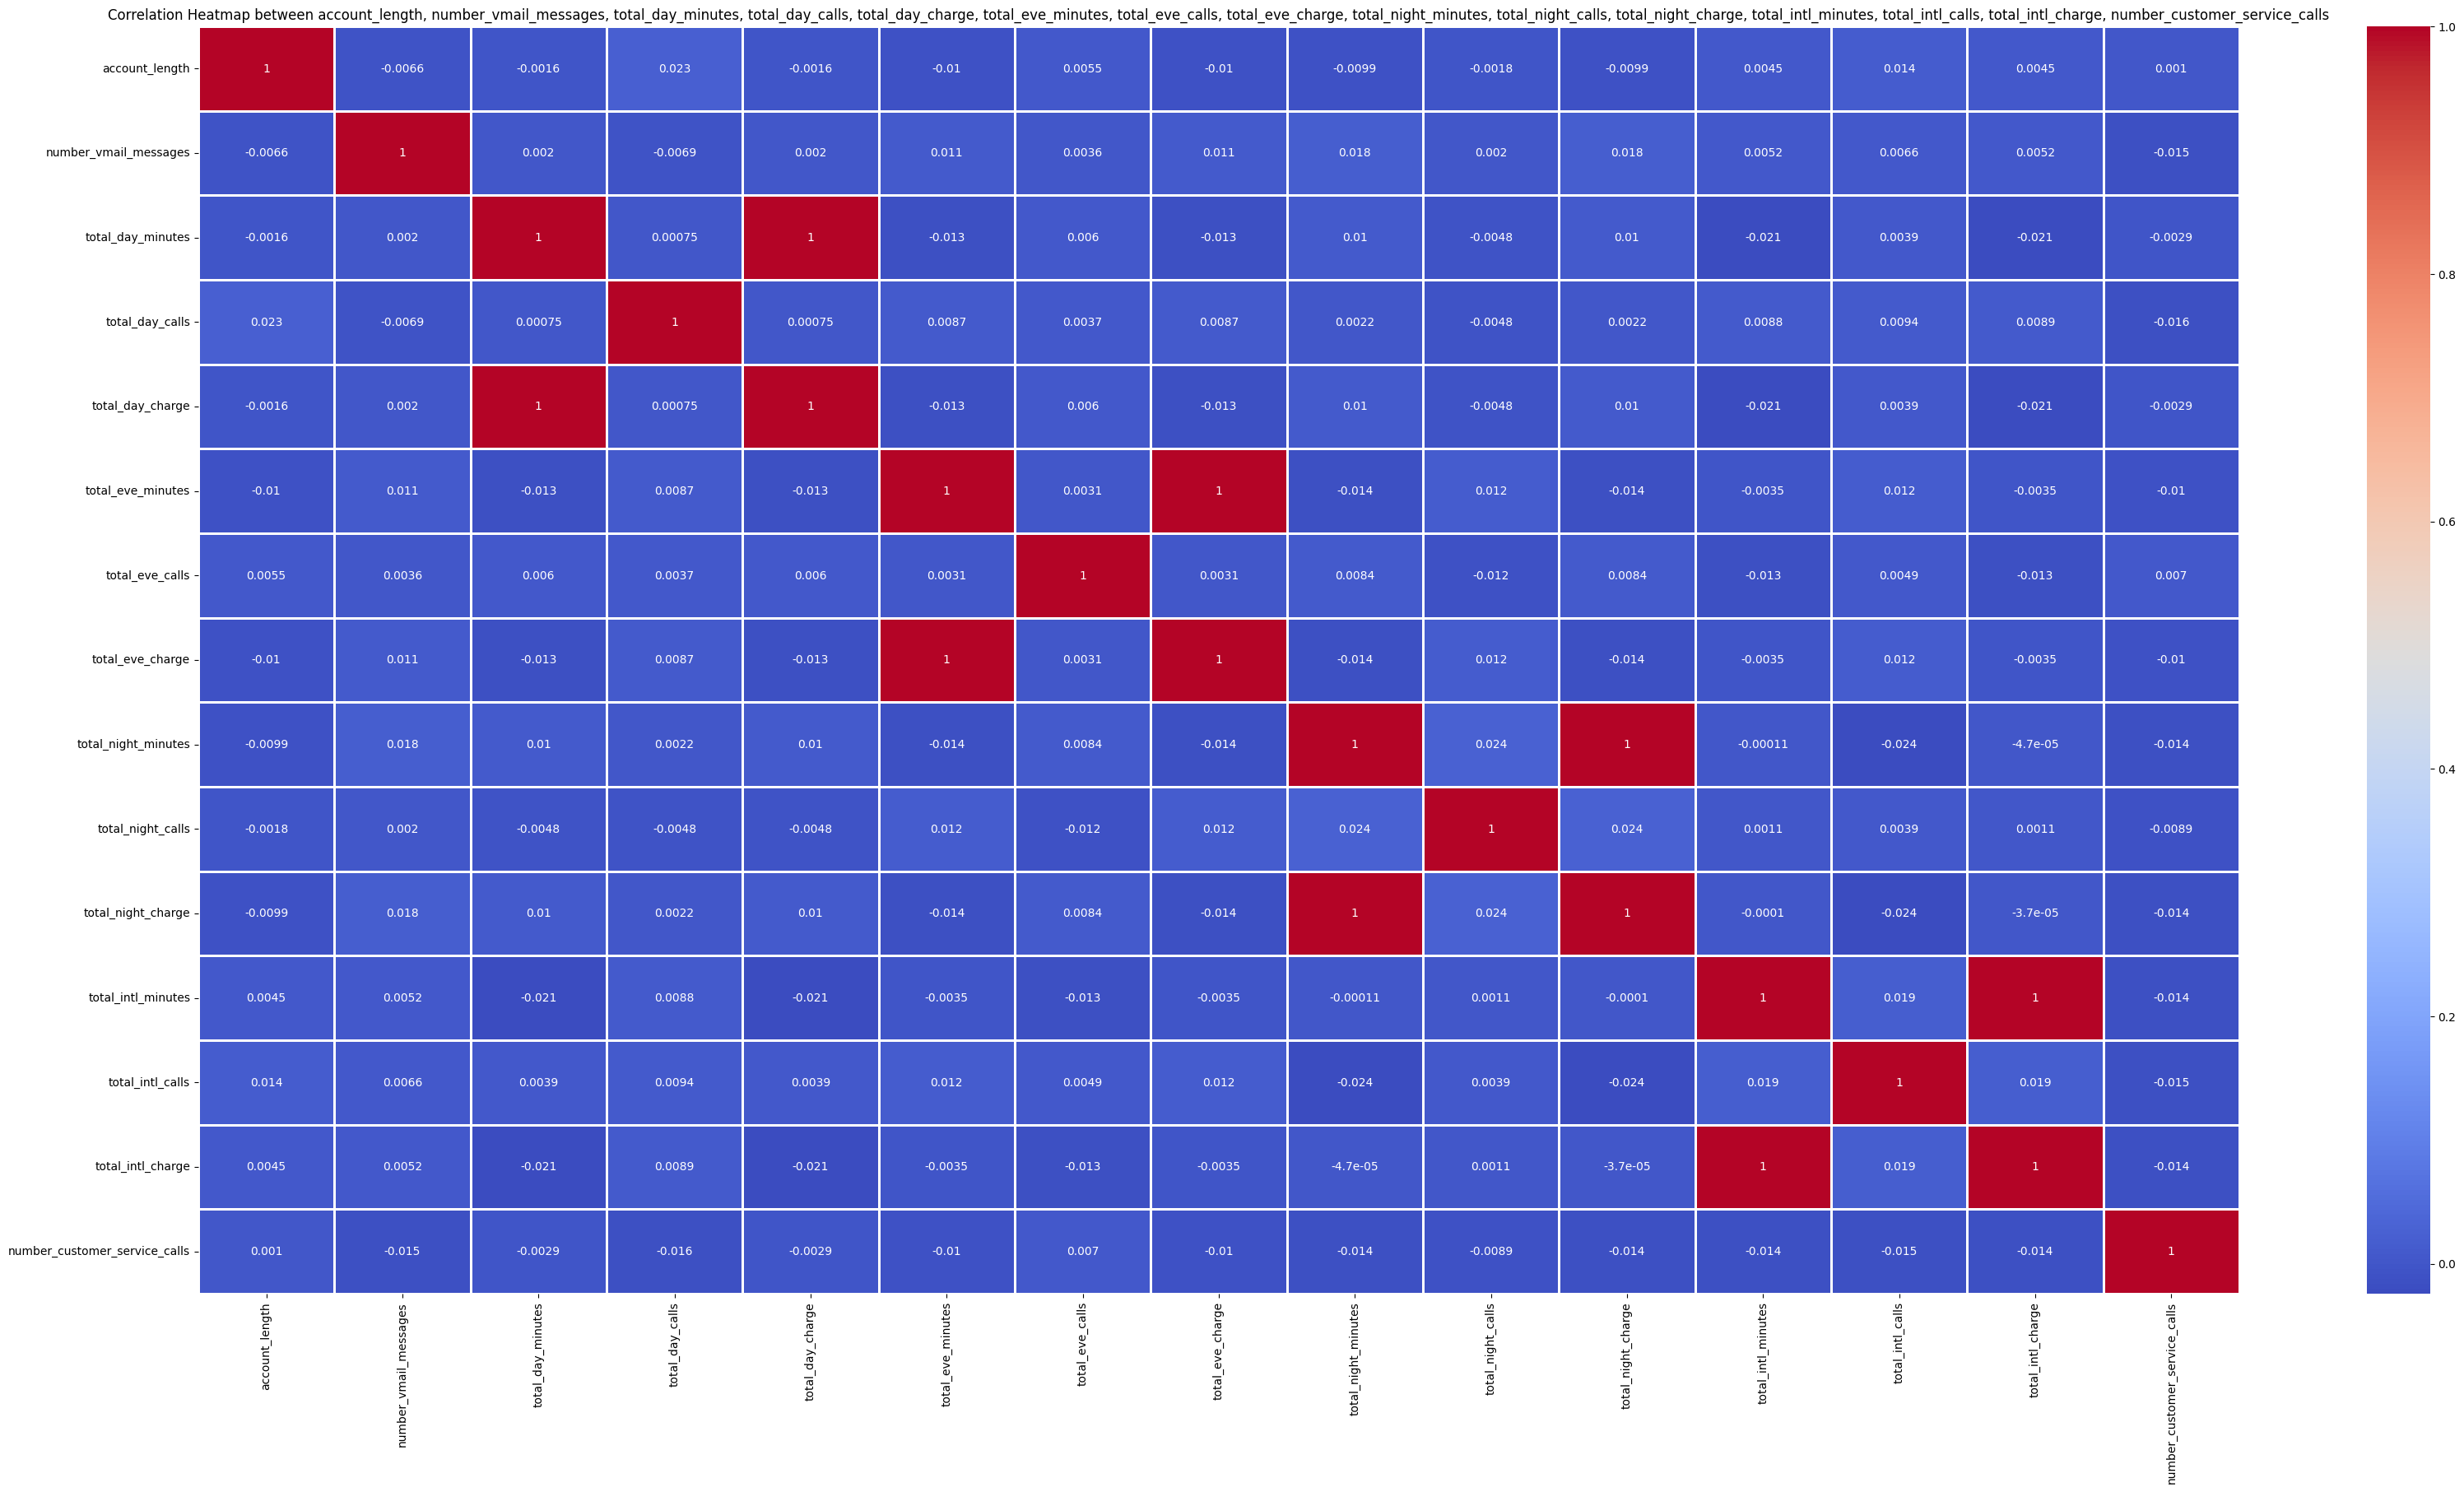

In [ ]:
# 1. Heat Map: Before the Outlier Removal to check the Correlation

l=dftr.select_dtypes(include=['int','float'])
plt.figure(figsize=(40,20))
sns.heatmap(l.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title(f'Correlation Heatmap between {", ".join(l)}')
plt.show()

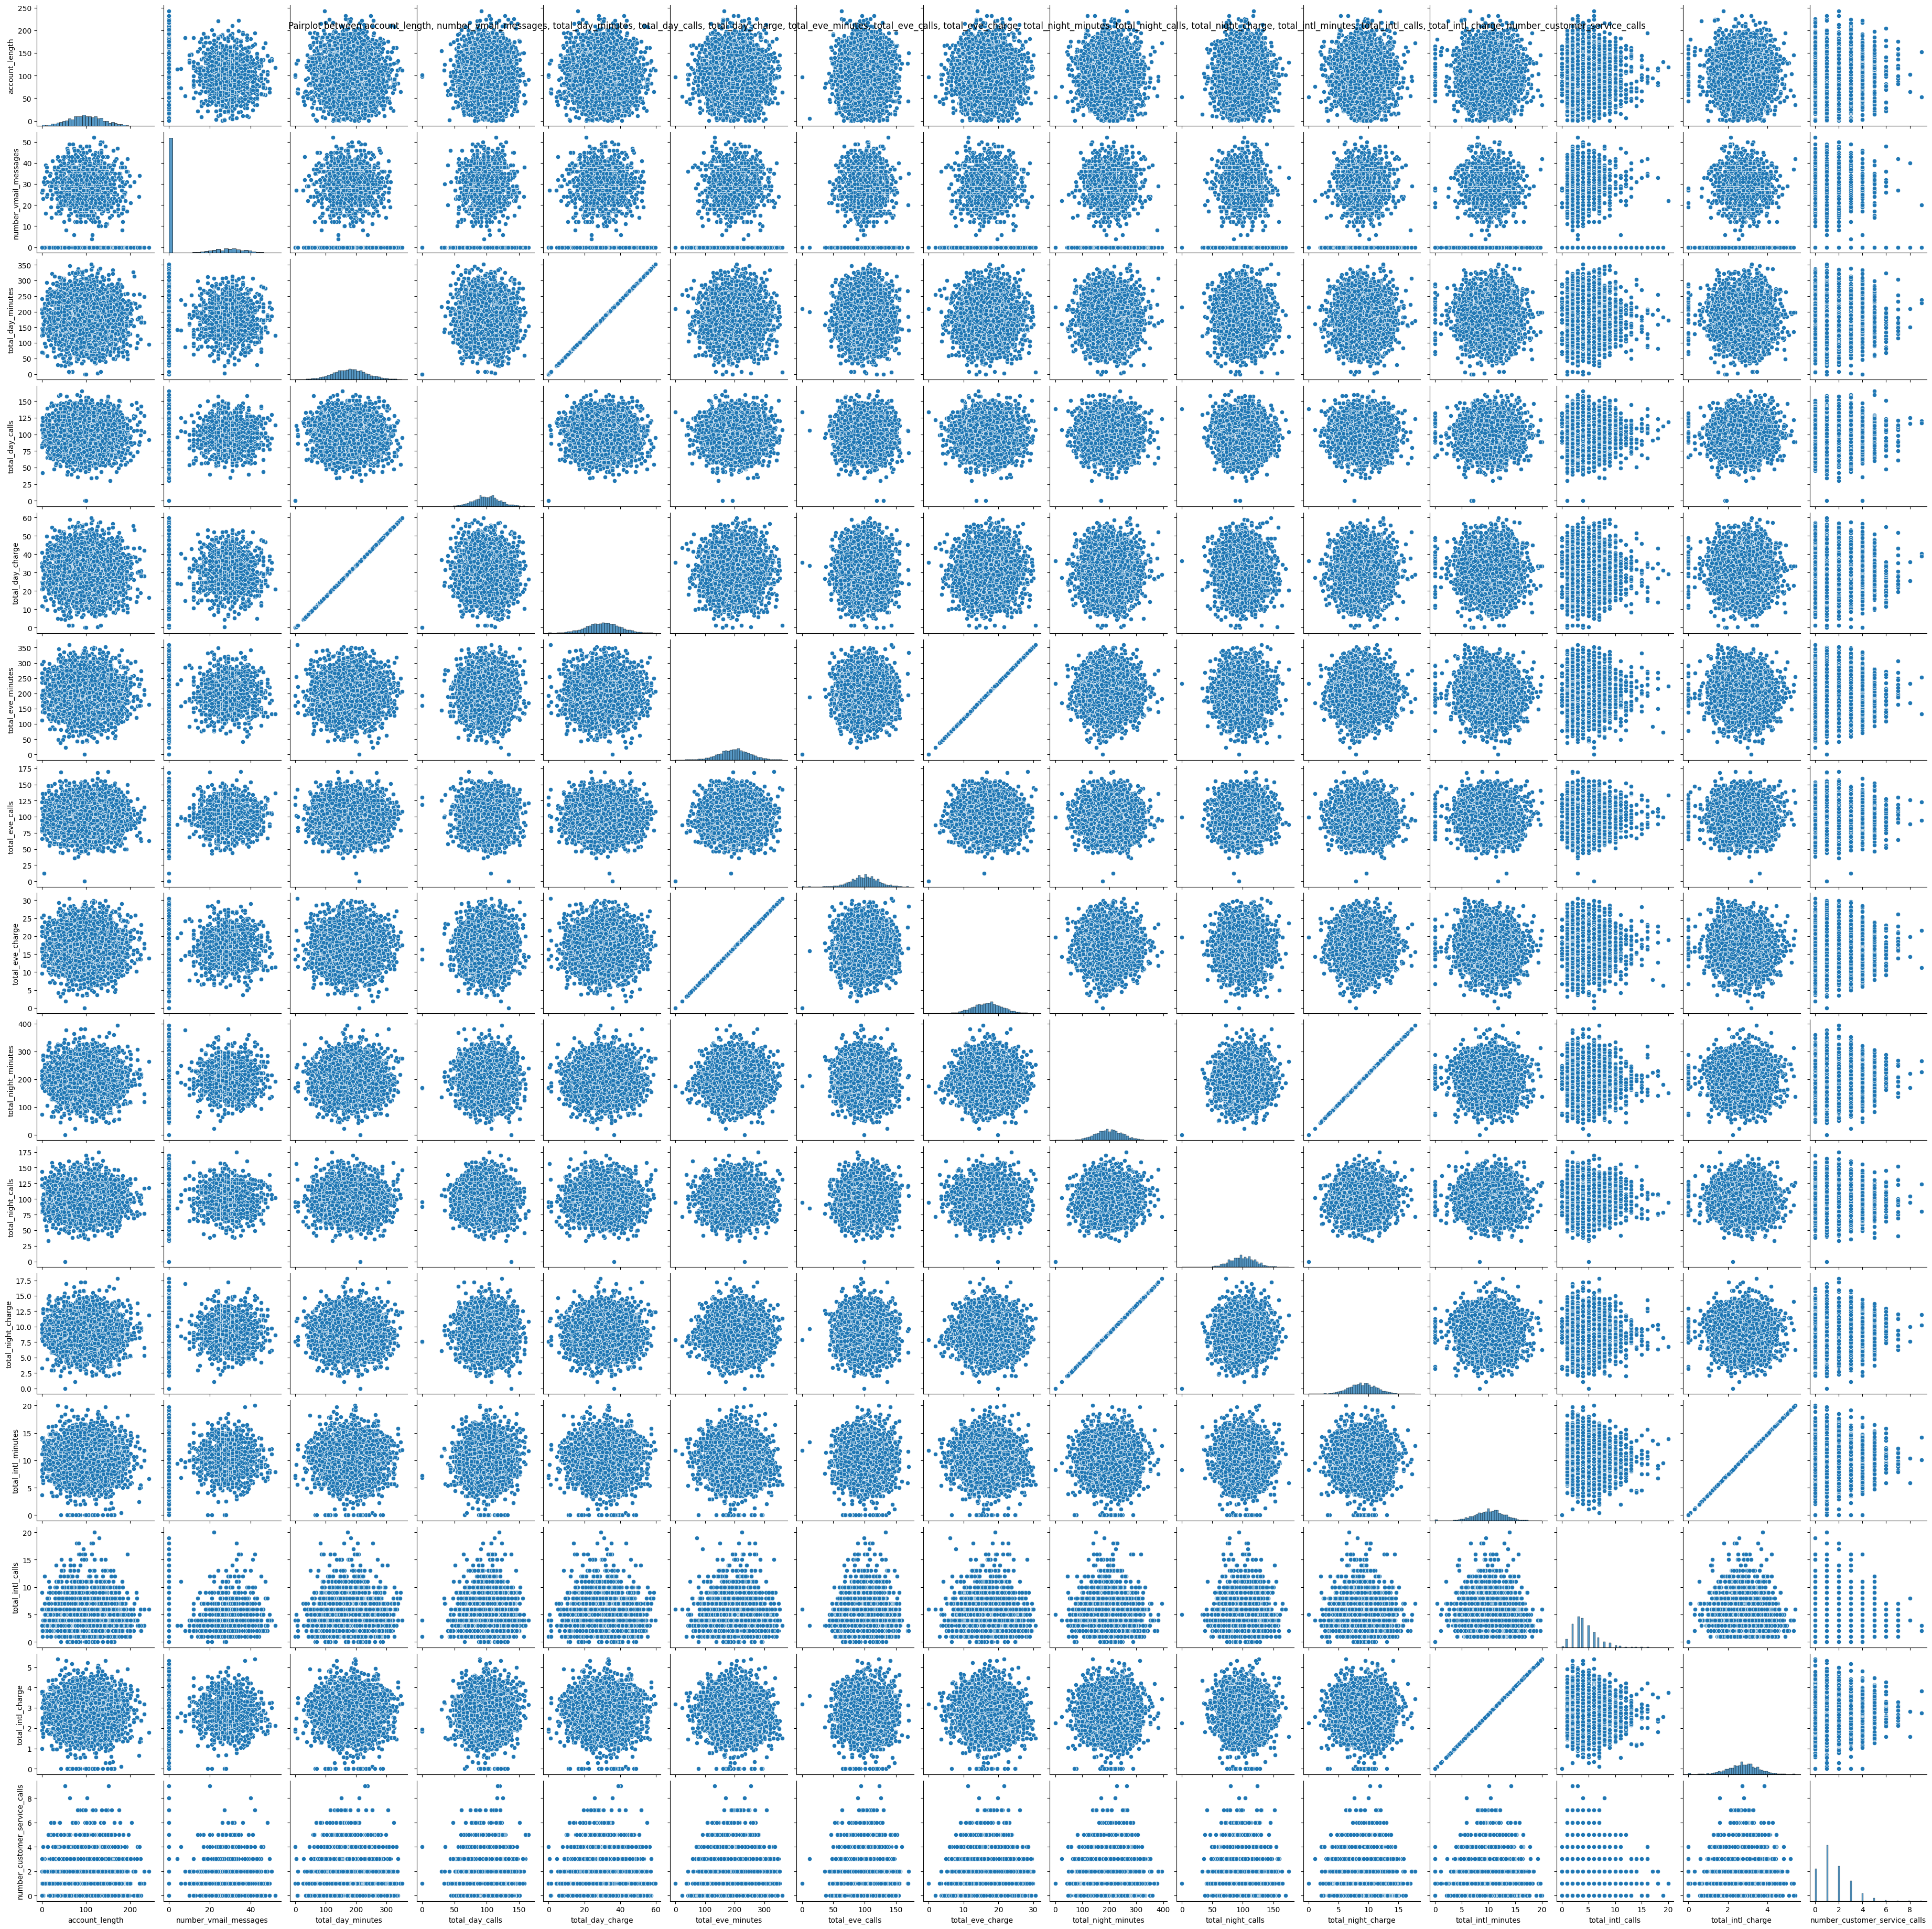

In [ ]:
# 2. Pair Plot

num = dftr.select_dtypes(include=['number']).columns.tolist()
g= sns.pairplot(dftr, vars=num)
g.fig.suptitle(f'Pairplot between {", ".join(num)}',ha="center")

plt.show()

Outlier Identification and Replacement

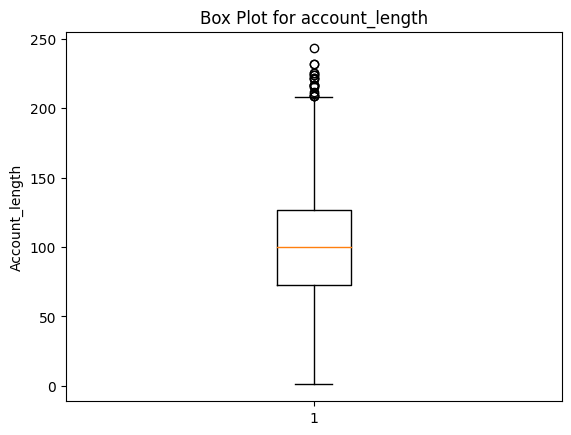

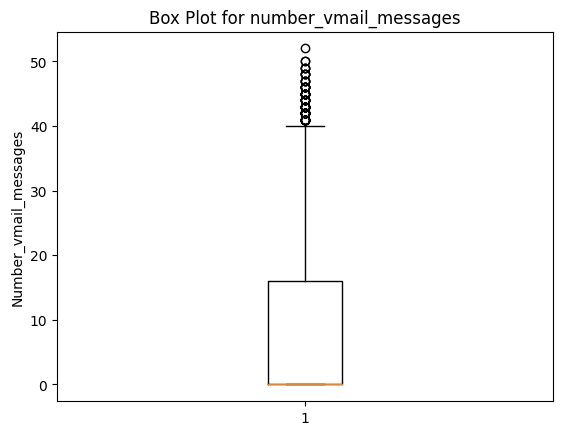

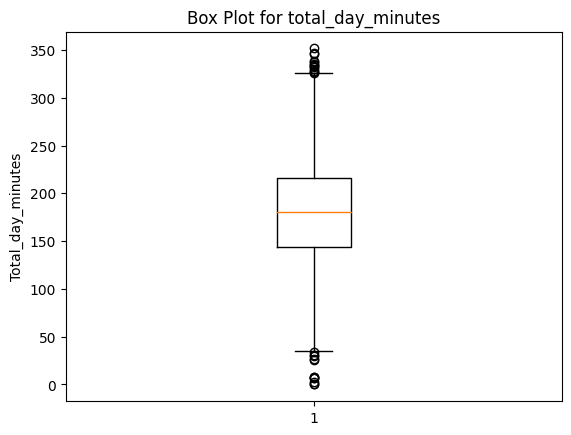

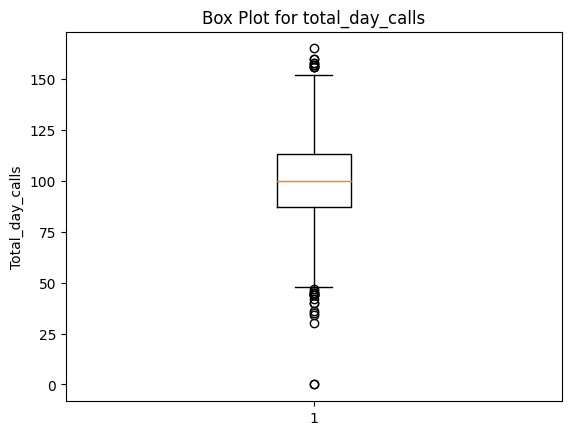

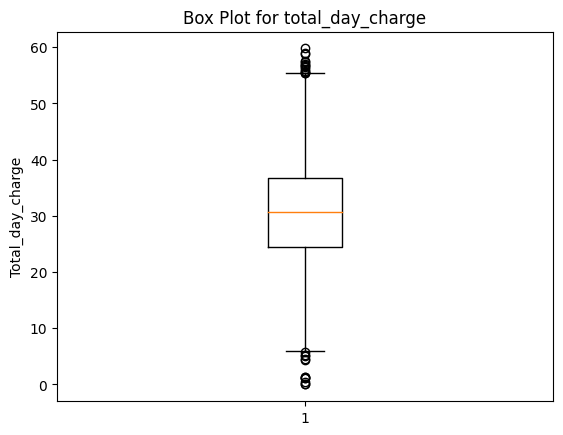

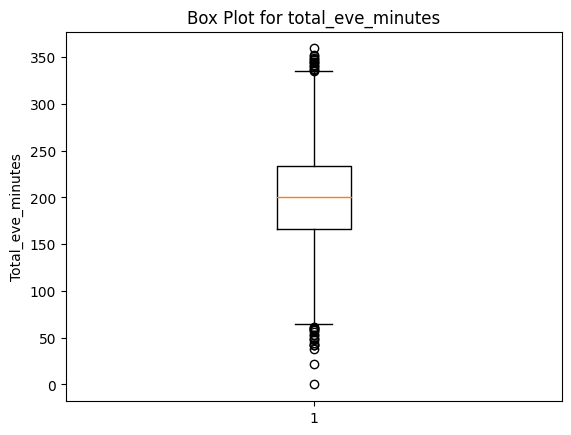

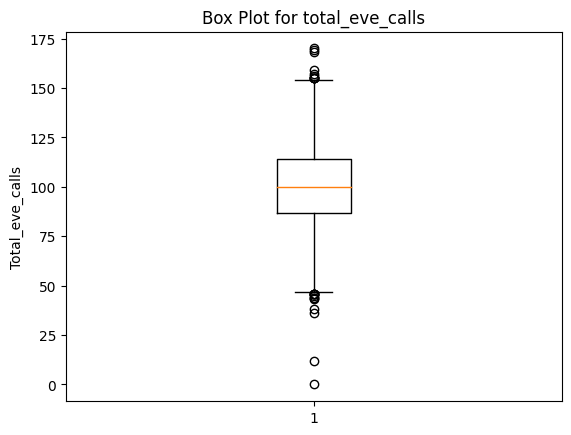

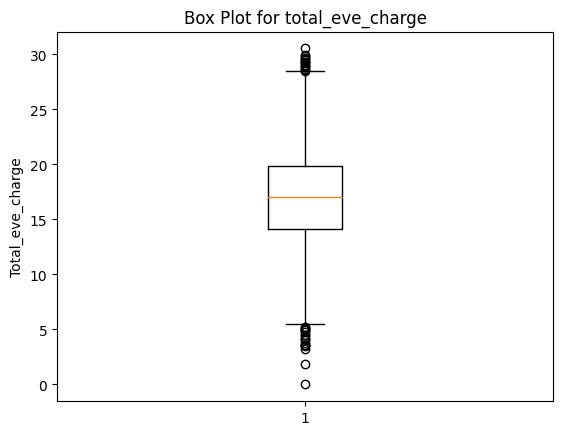

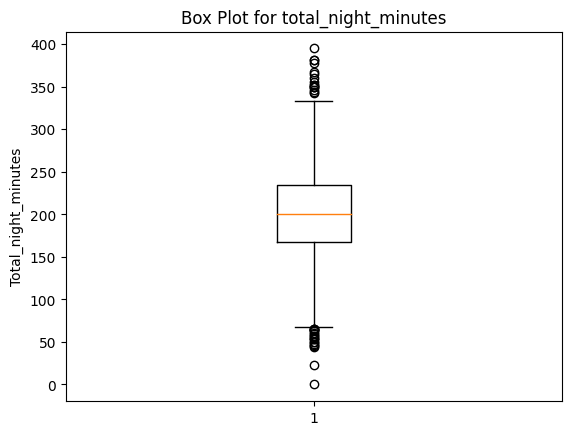

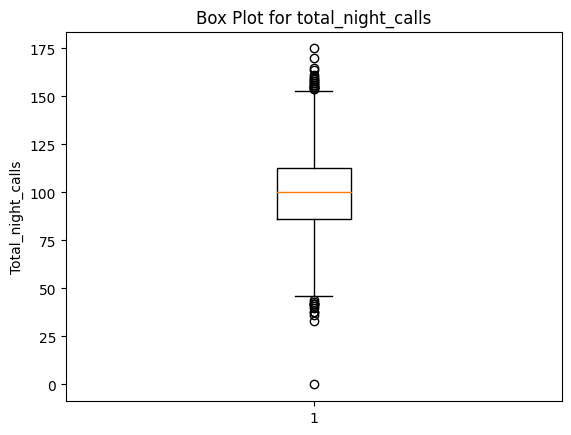

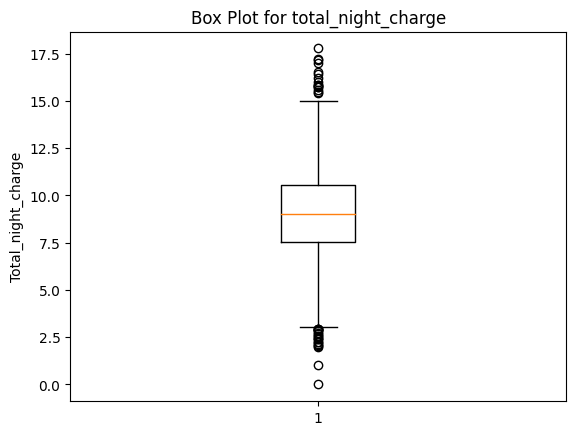

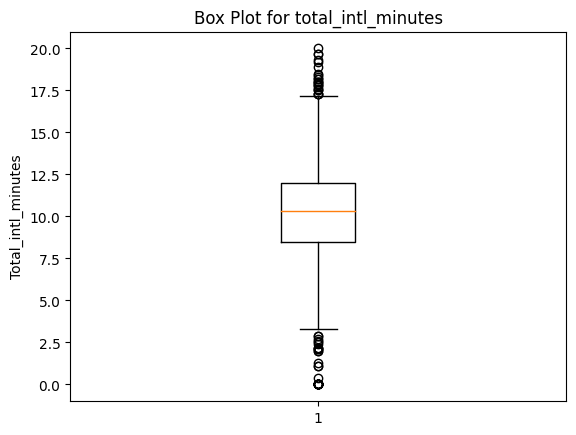

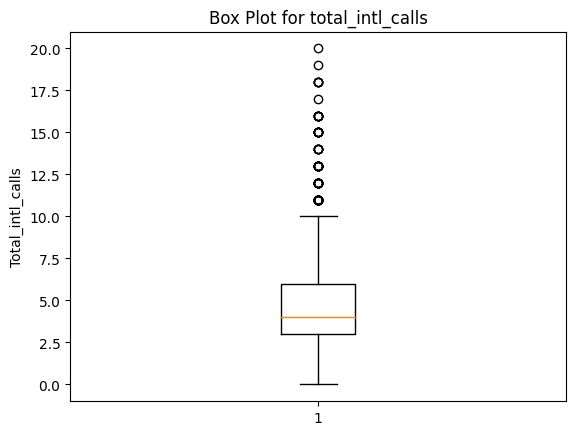

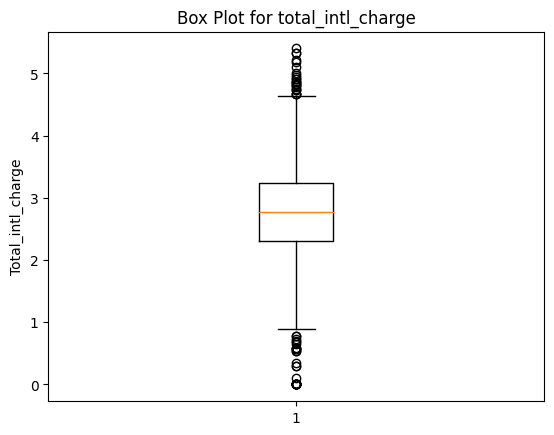

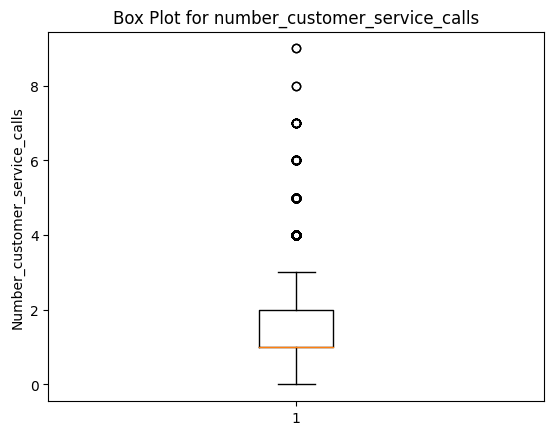

In [ ]:
for i in dftr.select_dtypes(include=['int','float']).columns:
    plt.boxplot(dftr[i])
    plt.title('Box Plot for {}'.format(i))
    plt.ylabel(i.capitalize())
    plt.show()

In [ ]:
x=dftr.select_dtypes(include=['int','float']).columns
for i in x:
    q1 = dftr[i].quantile(0.25)
    q3 = dftr[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in dftr[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {} of train set: {}'.format(i, s))

Number of Outliers in account_length of train set: 20
Number of Outliers in number_vmail_messages of train set: 86
Number of Outliers in total_day_minutes of train set: 25
Number of Outliers in total_day_calls of train set: 28
Number of Outliers in total_day_charge of train set: 26
Number of Outliers in total_eve_minutes of train set: 34
Number of Outliers in total_eve_calls of train set: 24
Number of Outliers in total_eve_charge of train set: 34
Number of Outliers in total_night_minutes of train set: 37
Number of Outliers in total_night_calls of train set: 33
Number of Outliers in total_night_charge of train set: 37
Number of Outliers in total_intl_minutes of train set: 62
Number of Outliers in total_intl_calls of train set: 100
Number of Outliers in total_intl_charge of train set: 62
Number of Outliers in number_customer_service_calls of train set: 335


In [ ]:
def replace_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1

        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)

        median = df[col].median()

        df[col] = np.where(df[col]<lower_bound, median, df[col])
        df[col] = np.where(df[col]>upper_bound, median, df[col])

replace_outliers(dftr, x)

y=dftr.select_dtypes(include=['int','float']).columns
for i in y:
    q1 = dftr[i].quantile(0.25)
    q3 = dftr[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in dftr[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {} of train set: {}'.format(i, s))

Number of Outliers in account_length of train set: 1
Number of Outliers in number_vmail_messages of train set: 1025
Number of Outliers in total_day_minutes of train set: 6
Number of Outliers in total_day_calls of train set: 0
Number of Outliers in total_day_charge of train set: 5
Number of Outliers in total_eve_minutes of train set: 8
Number of Outliers in total_eve_calls of train set: 5
Number of Outliers in total_eve_charge of train set: 8
Number of Outliers in total_night_minutes of train set: 5
Number of Outliers in total_night_calls of train set: 0
Number of Outliers in total_night_charge of train set: 6
Number of Outliers in total_intl_minutes of train set: 6
Number of Outliers in total_intl_calls of train set: 185
Number of Outliers in total_intl_charge of train set: 6
Number of Outliers in number_customer_service_calls of train set: 0


Heat Map

To Check the Correlation after the Outlier Removal

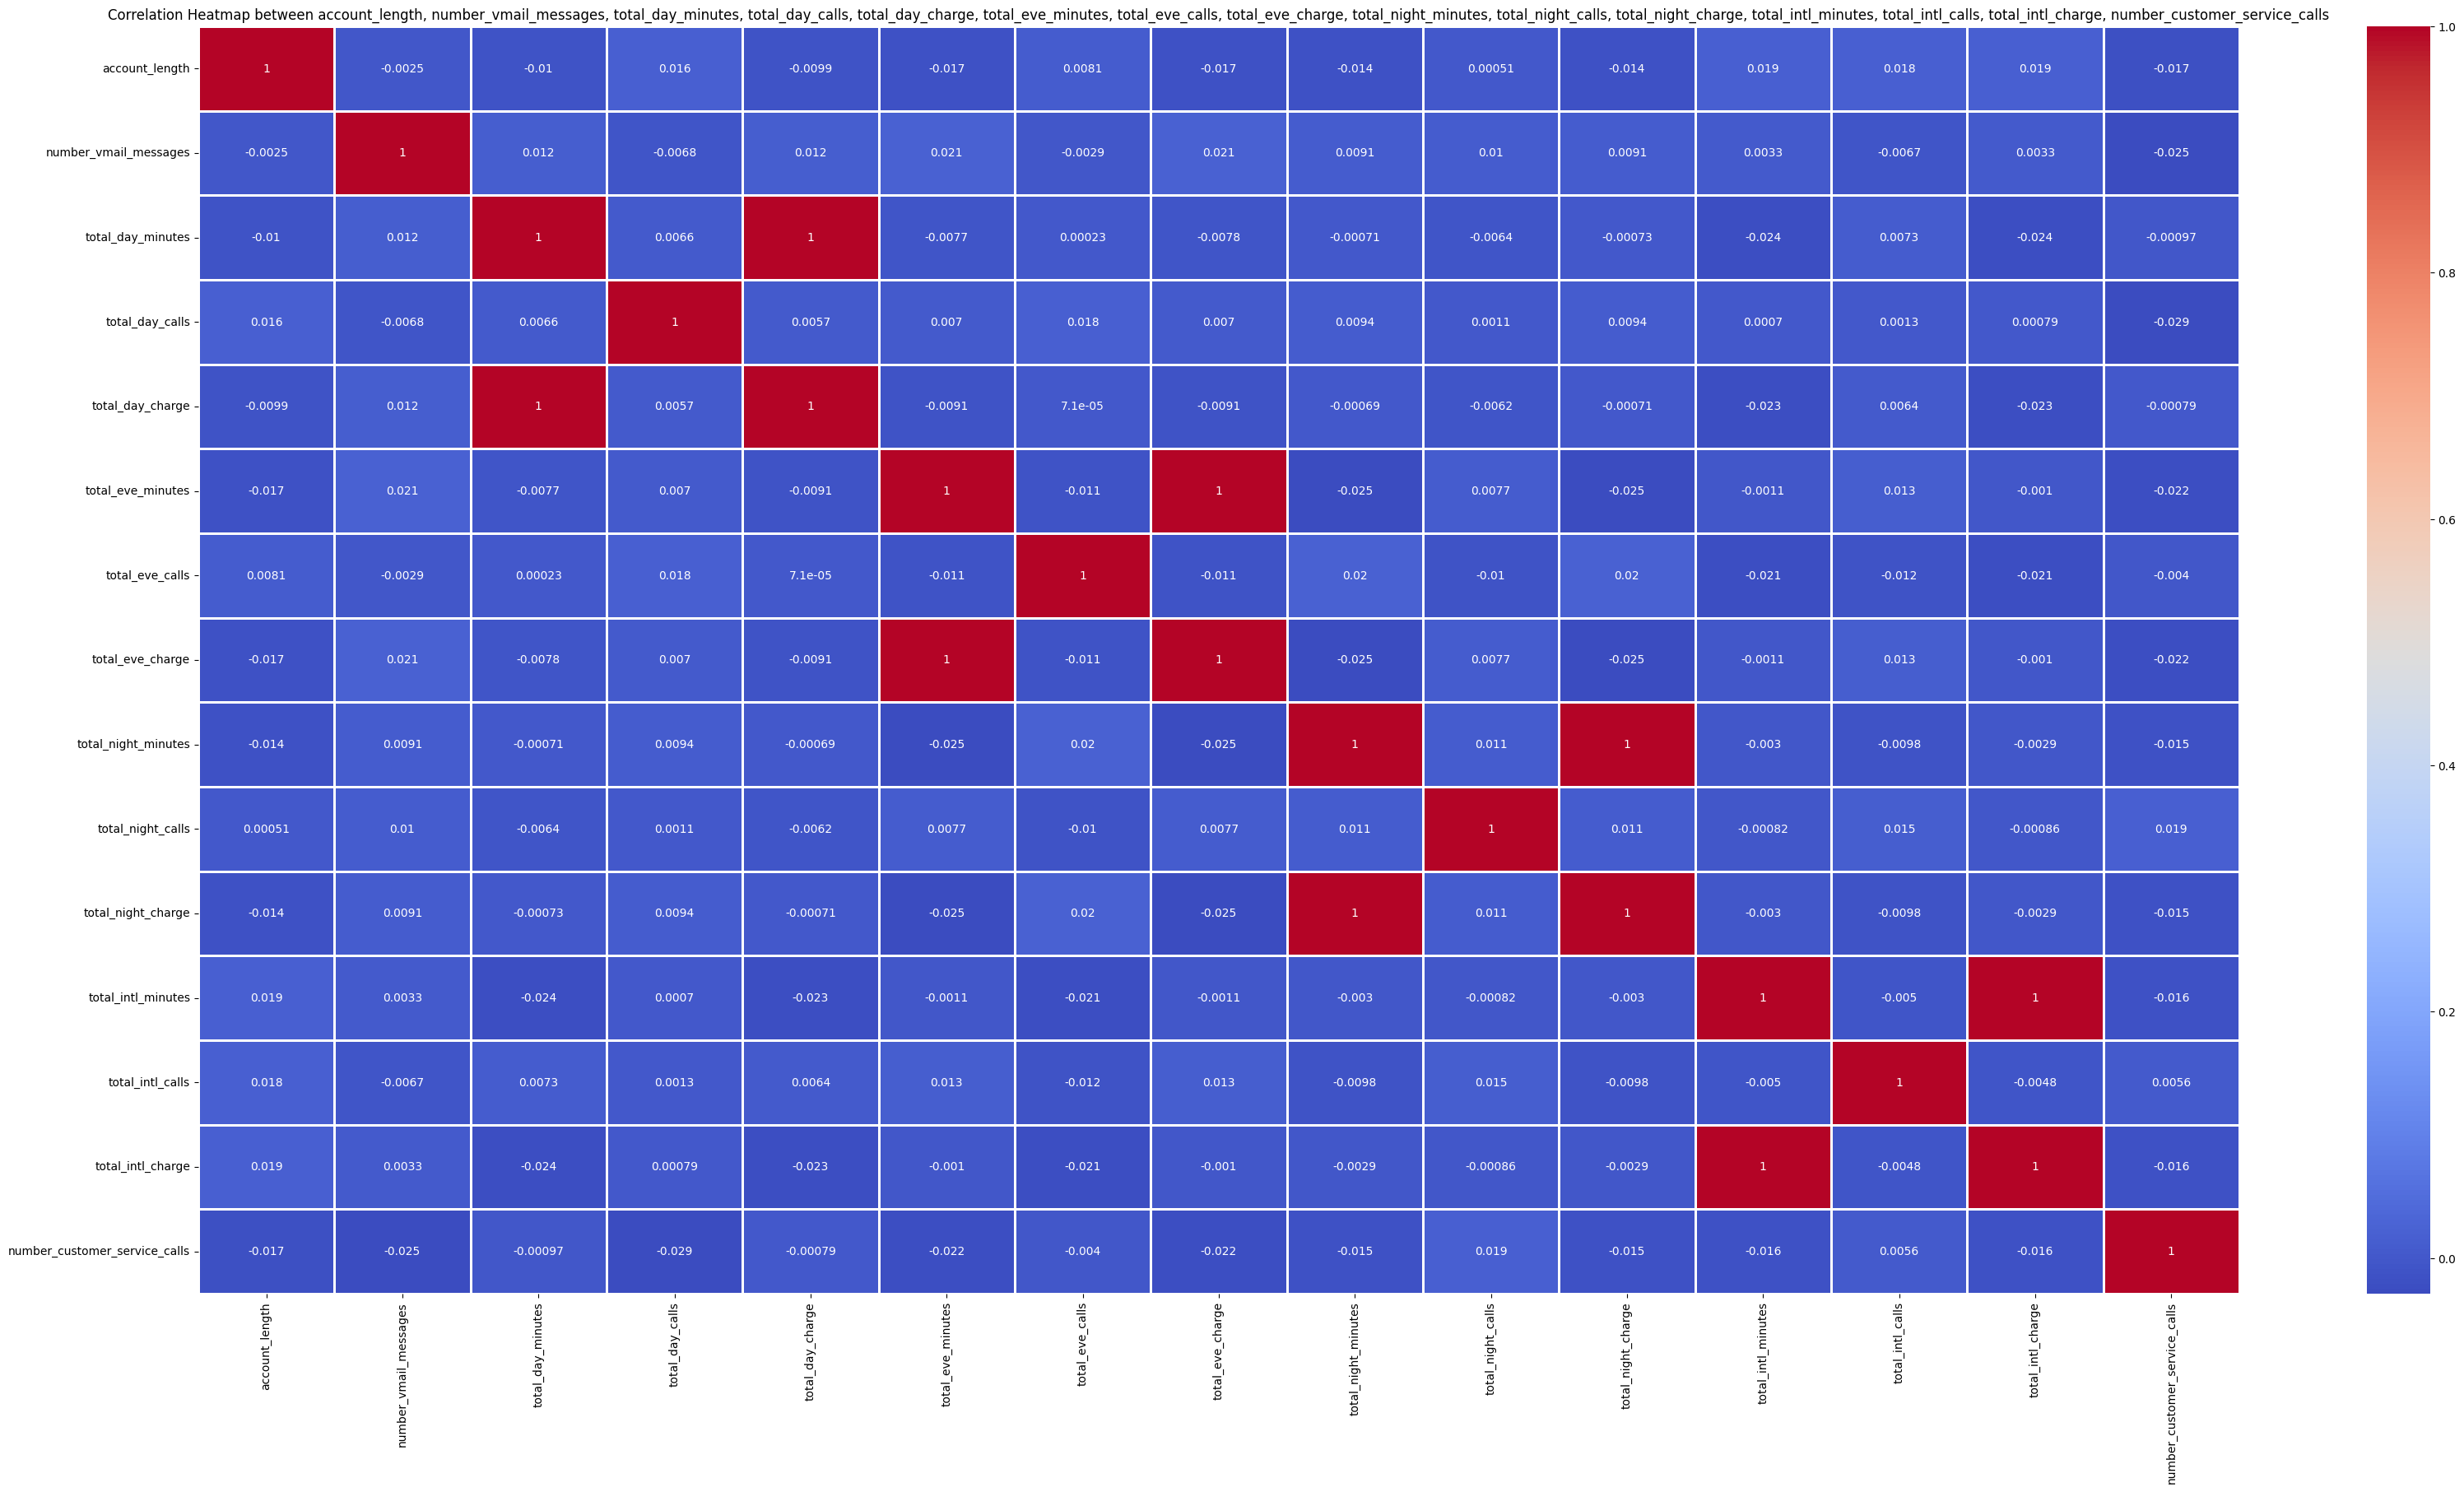

In [ ]:
l=dftr.select_dtypes(include=['int','float'])
plt.figure(figsize=(40,20))
sns.heatmap(l.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title(f'Correlation Heatmap between {", ".join(l)}')
plt.show()

Removal of Multicollinearity

In [ ]:
for data in [dftr, dfte]:
    data.drop(columns=['total_day_charge',
                       'total_eve_charge',
                      'total_night_charge',
                      'total_intl_charge'], inplace=True)

dftr.head()

state  account_length area_code international_plan voice_mail_plan  \
0    OH           107.0       415                 no             yes   
1    NJ           137.0       415                 no              no   
2    OH            84.0       408                yes              no   
3    OK            75.0       415                yes              no   
4    MA           121.0       510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                   26.0              161.6            123.0   
1                    0.0              243.4            114.0   
2                    0.0              299.4             71.0   
3                    0.0              166.7            113.0   
4                   24.0              218.2             88.0   

   total_eve_minutes  total_eve_calls  total_night_minutes  total_night_calls  \
0              195.5            103.0                254.4              103.0   
1              121.2            110.0                162.6              104.0   
2              200.7             88.0                196.9               89.0   
3              148.3            122.0                186.9              121.0   
4              200.7            108.0                212.6              118.0   

   total_intl_minutes  total_intl_calls  number_customer_service_calls churn  
0                13.7               3.0                            1.0    no  
1                12.2               5.0                            0.0    no  
2                 6.6               7.0                            2.0    no  
3                10.1               3.0                            3.0    no  
4                 7.5               7.0                            3.0    no

Label Encoding

In [ ]:
le = LabelEncoder()

dftr.state = le.fit_transform(dftr.state)
dftr.international_plan = le.fit_transform(dftr.international_plan)
dftr.voice_mail_plan = le.fit_transform(dftr.voice_mail_plan)
dftr.churn = le.fit_transform(dftr.churn)

dftr.head()

state  account_length area_code  international_plan  voice_mail_plan  \
0     35           107.0       415                   0                1   
1     31           137.0       415                   0                0   
2     35            84.0       408                   1                0   
3     36            75.0       415                   1                0   
4     19           121.0       510                   0                1   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                   26.0              161.6            123.0   
1                    0.0              243.4            114.0   
2                    0.0              299.4             71.0   
3                    0.0              166.7            113.0   
4                   24.0              218.2             88.0   

   total_eve_minutes  total_eve_calls  total_night_minutes  total_night_calls  \
0              195.5            103.0                254.4              103.0   
1              121.2            110.0                162.6              104.0   
2              200.7             88.0                196.9               89.0   
3              148.3            122.0                186.9              121.0   
4              200.7            108.0                212.6              118.0   

   total_intl_minutes  total_intl_calls  number_customer_service_calls  churn  
0                13.7               3.0                            1.0      0  
1                12.2               5.0                            0.0      0  
2                 6.6               7.0                            2.0      0  
3                10.1               3.0                            3.0      0  
4                 7.5               7.0                            3.0      0

In [ ]:
dfte.state = le.fit_transform(dfte.state)
dfte.international_plan = le.fit_transform(dfte.international_plan)
dfte.voice_mail_plan = le.fit_transform(dfte.voice_mail_plan)

dfte.head()

state  account_length area_code  international_plan  voice_mail_plan  \
0     16             128       415                   0                1   
1      1             118       510                   1                0   
2     12              62       415                   0                0   
3     46              93       510                   0                0   
4     29             174       415                   0                0   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                      0              223.4               98   
2                      0              120.7               70   
3                      0              190.7              114   
4                      0              124.3               76   

   total_eve_minutes  total_eve_calls  total_night_minutes  total_night_calls  \
0              197.4               99                244.7                 91   
1              220.6              101                203.9                118   
2              307.2               76                203.0                 99   
3              218.2              111                129.6                121   
4              277.1              112                250.7                115   

   total_intl_minutes  total_intl_calls  number_customer_service_calls  
0                10.0                 3                              1  
1                 6.3                 6                              0  
2                13.1                 6                              4  
3                 8.1                 3                              3  
4                15.5                 5                              3

Feature Engineering

In [ ]:
for data in [dftr,dfte]:
    data['total_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
    data['total_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
    data.drop(columns= ['state', 'area_code'], inplace= True)
    data.drop(columns=['total_day_calls','total_eve_calls','total_night_calls','total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)

Variable Splitting

In [ ]:
y = dftr['churn']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [ ]:
x=dftr.drop(columns =['churn'],axis =1)
x.head()

account_length  international_plan  voice_mail_plan  number_vmail_messages  \
0           107.0                   0                1                   26.0   
1           137.0                   0                0                    0.0   
2            84.0                   1                0                    0.0   
3            75.0                   1                0                    0.0   
4           121.0                   0                1                   24.0   

   total_intl_minutes  total_intl_calls  number_customer_service_calls  \
0                13.7               3.0                            1.0   
1                12.2               5.0                            0.0   
2                 6.6               7.0                            2.0   
3                10.1               3.0                            3.0   
4                 7.5               7.0                            3.0   

   total_minutes  total_calls  
0          611.5        329.0  
1          527.2        328.0  
2          697.0        248.0  
3          501.9        356.0  
4          631.5        314.0

Scaling

In [ ]:
scale = MinMaxScaler()
df1=pd.DataFrame(scale.fit_transform(x),columns =x.columns)
df1.head()

account_length  international_plan  voice_mail_plan  number_vmail_messages  \
0        0.512077                 0.0              1.0                   0.65   
1        0.657005                 0.0              0.0                   0.00   
2        0.400966                 1.0              0.0                   0.00   
3        0.357488                 1.0              0.0                   0.00   
4        0.579710                 0.0              1.0                   0.60   

   total_intl_minutes  total_intl_calls  number_customer_service_calls  \
0            0.748201               0.3                       0.333333   
1            0.640288               0.5                       0.000000   
2            0.237410               0.7                       0.666667   
3            0.489209               0.3                       1.000000   
4            0.302158               0.7                       1.000000   

   total_minutes  total_calls  
0       0.558916     0.643836  
1       0.418813     0.639269  
2       0.701014     0.273973  
3       0.376766     0.767123  
4       0.592156     0.575342

In [ ]:
scale = MinMaxScaler()
dfte=pd.DataFrame(scale.fit_transform(dfte),columns =dfte.columns)
dfte.head()

account_length  international_plan  voice_mail_plan  number_vmail_messages  \
0        0.535865                 0.0              1.0               0.490196   
1        0.493671                 1.0              0.0               0.000000   
2        0.257384                 0.0              0.0               0.000000   
3        0.388186                 0.0              0.0               0.000000   
4        0.729958                 0.0              0.0               0.000000   

   total_intl_minutes  total_intl_calls  number_customer_service_calls  \
0            0.529101          0.157895                       0.166667   
1            0.333333          0.315789                       0.000000   
2            0.693122          0.315789                       0.666667   
3            0.428571          0.157895                       0.500000   
4            0.820106          0.263158                       0.500000   

   total_minutes  total_calls  
0       0.765479     0.521505  
1       0.647422     0.612903  
2       0.613578     0.225806  
3       0.429624     0.768817  
4       0.655783     0.537634

Train Test Splitting

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df1,y,test_size=0.2,random_state=0)

Correlation with Churn

In [ ]:
dftr.corr().churn.sort_values(ascending= False)

churn                            1.000000
international_plan               0.259053
total_minutes                    0.189519
total_intl_minutes               0.041656
account_length                   0.015382
total_calls                     -0.007605
number_customer_service_calls   -0.024970
total_intl_calls                -0.050676
number_vmail_messages           -0.107983
voice_mail_plan                 -0.114643
Name: churn, dtype: float64

SMOTE Balancing

In [ ]:
y.value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [ ]:
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x_train,y_train)

In [ ]:
y_smote.value_counts()

0    2917
1    2917
Name: churn, dtype: int64

End of Exploratory Data Analysis

Model 1: Random Forest

In [ ]:
model1=RandomForestClassifier(criterion='entropy')

In [ ]:
model1.fit(x_smote,y_smote)

RandomForestClassifier(criterion='entropy')

In [ ]:
ypre=model1.predict(dfte)

In [ ]:
ypred=model1.predict(x_test)

In [ ]:
accuracy_score(y_test,ypred)

0.8917647058823529

In [ ]:
pd.crosstab(y_test,ypred)

col_0    0   1
churn         
0      690  45
1       47  68

Model 2: SVC

In [ ]:
model2=SVC()

In [ ]:
model2.fit(x_smote,y_smote)
y_pred1 = model2.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.8058823529411765

In [ ]:
pd.crosstab(y_test,y_pred1)

col_0    0    1
churn          
0      613  122
1       43   72

In [ ]:
ypre=model1.predict(dfte)

Model 3: Logisitic Regression

In [ ]:
model3 =LogisticRegression()

In [ ]:
model3.fit(x_smote,y_smote)
y_pred = model3.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7588235294117647

In [ ]:
pd.crosstab(y_test,y_pred)

col_0    0    1
churn          
0      570  165
1       40   75

In [ ]:
ypre=model3.predict(dfte)